In [79]:
# import libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
#import data from the cleaned CSV files
movieGross = pd.read_csv('cleanedData/movieGrossClean.csv')
movieBudgets = pd.read_csv('cleanedData/movieBudgets.csv')
movieInfo = pd.read_csv('cleanedData/movieInfoClean.csv')
reviews = pd.read_csv('cleanedData/reviewsClean.csv')
tmdbMovies = pd.read_csv('cleanedData/tmdbMoviesClean.csv')

In [4]:
# Connect to sql database
conn = sqlite3.connect('data/im.db')

In [5]:
# view movieGross
movieGross.head()

,Unnamed: 0,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000,652000000,2010-01-01
1,1,Alice in Wonderland (2010),BV,334200000,691300000,2010-01-01
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010-01-01
3,3,Inception,WB,292600000,535700000,2010-01-01
4,4,Shrek Forever After,P/DW,238700000,513900000,2010-01-01


In [6]:
# view movieBudgets
movieBudgets.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [7]:
# view movieInfo
movieInfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"['Action', 'Adventure', 'Classics', 'Drama']",William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,-,0.0,104,-
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"['Drama', 'Science Fiction', 'Fantasy']",David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"['Drama', 'Music']",Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,-,0.0,116,-
3,6,Michael Douglas runs afoul of a treacherous su...,R,"['Drama', 'Mystery']",Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,-,0.0,128,-
4,7,-,NR,"['Drama', 'Romance']",Rodney Bennett,Giles Cooper,-,-,-,0.0,200,-


In [8]:
# view reviews
reviews.head()

,Unnamed: 0,id,review,rating,fresh,critic,top_critic,publisher,date
0,0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,1,3,It's an allegory in search of a meaning that n...,-,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,2,3,... life lived in a bubble in financial dealin...,-,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,3,Continuing along a line introduced in last yea...,-,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,4,3,... a perverse twist on neorealism...,-,fresh,-,0,Cinema Scope,"October 12, 2017"


In [9]:
# view tmdbMovies
tmdbMovies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,0,0
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,0,0,0,0,0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,0,0,0,1,0,0,0,0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,0,0,0,0,0,0,0
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,0,0,1,0,0,0,0


In [10]:
tmdbMovies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'genres', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [11]:
tmdbMovies.columns[11:]

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [12]:
tmdbMovies[tmdbMovies['Action']==1]['popularity'].mean()

6.495046707503827

In [13]:
popularityByGenre = {}
for i in range(11,30):
    popularityByGenre[tmdbMovies.columns[i]] = tmdbMovies[tmdbMovies[tmdbMovies.columns[i]]==1]['popularity'].mean()

<AxesSubplot:>

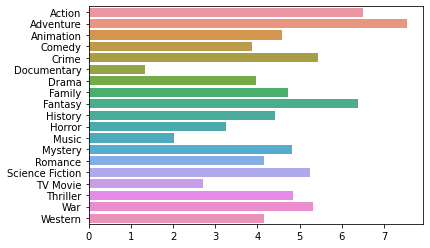

In [14]:
sns.barplot(y = list(popularityByGenre.keys()), x=list(popularityByGenre.values()))

In [15]:
popularityByGenre.keys()

dict_keys(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'])

In [16]:
popularityByGenre.values()

dict_values([6.495046707503827, 7.557082142857143, 4.584240242261104, 3.8634350672328375, 5.431549668874172, 1.3483568548387097, 3.9796796432445465, 4.7358894568690095, 6.387317822651448, 4.419724637681159, 3.2478010869565215, 2.0237134964483032, 4.825350607287449, 4.162464454976304, 5.238196935300795, 2.7039409594095942, 4.839053983353152, 5.32019696969697, 4.162165853658536])

<AxesSubplot:xlabel='release_date', ylabel='popularity'>

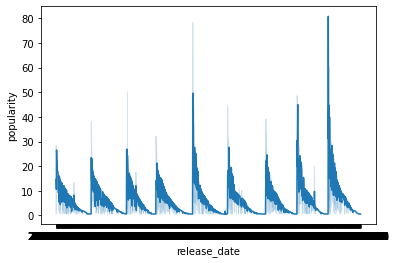

In [17]:
#useless plot
sns.lineplot(x=tmdbMovies[tmdbMovies['Action']==1]['release_date'], y=tmdbMovies[tmdbMovies['Action']==1]['popularity'])

In [18]:
# get popularity and release date for each genre
genre_dicts = {}
for i in range(11,30):
    genre_dicts[tmdbMovies.columns[i]] = tmdbMovies[tmdbMovies[tmdbMovies.columns[i]]==1][['popularity','release_date']]

In [19]:
genre_dicts

{'Action':        popularity release_date
 2          28.515   2010-05-07
 4          27.920   2010-07-16
 6          26.526   2009-12-18
 9          22.855   2010-11-04
 12         21.517   2010-08-03
 ...           ...          ...
 26399       0.600   2018-12-20
 26440       0.600   2018-01-03
 26479       0.600   2018-04-15
 26514       0.600   2018-10-01
 26515       0.600   2018-06-22
 
 [2612 rows x 2 columns],
 'Adventure':        popularity release_date
 0          33.533   2010-11-19
 1          28.734   2010-03-26
 2          28.515   2010-05-07
 4          27.920   2010-07-16
 5          26.691   2010-02-11
 ...           ...          ...
 26052       0.840   2018-09-16
 26242       0.600   2018-01-30
 26355       0.600   2018-11-23
 26514       0.600   2018-10-01
 26515       0.600   2018-06-22
 
 [1400 rows x 2 columns],
 'Animation':        popularity release_date
 1          28.734   2010-03-26
 3          28.005   1995-11-22
 7          24.445   2010-06-17
 8          

<AxesSubplot:xlabel='release_date', ylabel='popularity'>

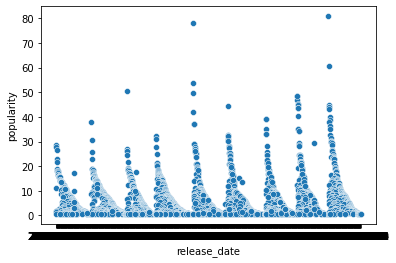

In [20]:
genre_dicts['Action']
sns.scatterplot(x=genre_dicts['Action']['release_date'],y=genre_dicts['Action']['popularity'])

In [21]:
#average popularity by year
for i in genre_dicts:
    genre_dicts[i]['year'] = pd.to_datetime(genre_dicts[i]['release_date']).dt.year
    

In [22]:
avgPopByGenre = {}
for i in genre_dicts:
    avgPopByGenre[i] = genre_dicts[i].groupby(genre_dicts[i]['year']).mean()

In [23]:
avgPopByGenre

{'Action':       popularity
 year            
 1974    9.569000
 1980   14.882000
 1982   12.063000
 1983    6.306000
 1984    7.833500
 1985    7.561000
 1986    6.852500
 1988    3.880500
 1989    1.400000
 1991   16.735750
 1993   11.485000
 1995   13.966333
 1996   10.174667
 1997   11.832500
 1998   16.487000
 2001   10.886000
 2002   15.067667
 2003    8.661000
 2004   16.482667
 2005   10.215000
 2007   15.620000
 2008    0.613000
 2009    9.651500
 2010    4.980996
 2011    5.259779
 2012    5.594142
 2013    5.574356
 2014    6.578004
 2015    6.326961
 2016    6.260686
 2017    7.906579
 2018    9.237353
 2019   10.414750,
 'Adventure':       popularity
 year            
 1961    3.454000
 1966    7.139000
 1968   23.781000
 1982   12.063000
 1985   11.657000
 1986    9.818600
 1988    6.744000
 1995   10.579000
 1996   13.860000
 1997   13.514000
 1998   15.799000
 2003    8.613000
 2004   15.203667
 2005    4.862333
 2006    1.937000
 2008    8.787000
 2009    8.353500
 201

<AxesSubplot:xlabel='year', ylabel='popularity'>

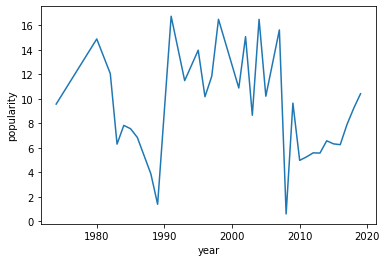

In [24]:
sns.lineplot(x = avgPopByGenre['Action'].index, y = avgPopByGenre['Action']["popularity"])

In [25]:
avgPopByGenre['Action'].index

Int64Index([1974, 1980, 1982, 1983, 1984, 1985, 1986, 1988, 1989, 1991, 1993,
            1995, 1996, 1997, 1998, 2001, 2002, 2003, 2004, 2005, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='year')

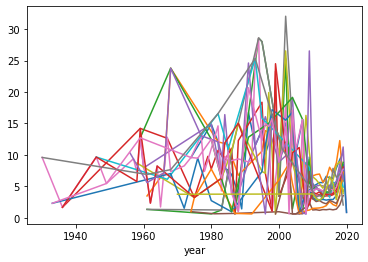

In [26]:
# fig, ax = plt.subplots()
for i in avgPopByGenre:
    sns.lineplot(x=avgPopByGenre[i].index, y=avgPopByGenre[i]['popularity'].values)

In [27]:
# it worked. Split into important genres. We have the list of most popular genres. Lets view the top 5 most popular generes
#get list of top 5 genres
mostPopGenre = sorted(popularityByGenre, key=popularityByGenre.get, reverse=True)[:5]

In [28]:
avgPopByGenre['Action'][avgPopByGenre['Action'].index>2009]

,popularity
year,
2010,4.980996
2011,5.259779
2012,5.594142
2013,5.574356
2014,6.578004
2015,6.326961
2016,6.260686
2017,7.906579
2018,9.237353


In [29]:
#average population for the last 10 years
popLastTenYears = {}
for genre in avgPopByGenre:
    popLastTenYears[genre] = float(avgPopByGenre[genre][avgPopByGenre[genre].index>2009].mean())

In [30]:
mostPop10YR = sorted(popLastTenYears, key=popLastTenYears.get, reverse=True)[:5]

In [31]:
mostPop10YR
mostPopGenre
# these 2 lists share 4 categories: 'Adventure', 'Action', 'Fantasy', 'Crime'
# It seems that war movies have lost popularity, while science fiction movies took wars spot
# war fell from #5 to #8
# science fiction climbed from #6 to #5
# to see the decline in war films, the following graph will include: ['Adventure', 'Action', 'Fantasy', 'Crime','War','Science Fiction']

['Adventure', 'Action', 'Fantasy', 'Crime', 'War']

In [32]:
sorted(popLastTenYears, key=popLastTenYears.get, reverse=True)[:8]
sorted(popularityByGenre, key=popularityByGenre.get, reverse=True)[:8]

['Adventure',
 'Action',
 'Fantasy',
 'Crime',
 'War',
 'Science Fiction',
 'Thriller',
 'Mystery']

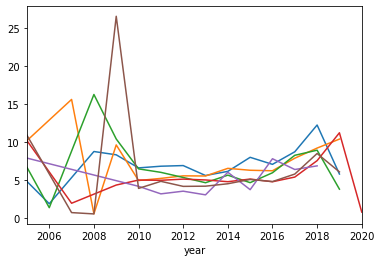

In [33]:
fig, ax = plt.subplots()
ax.set_xlim(2005,2020)
for i in ['Adventure', 'Action', 'Fantasy', 'Crime','War','Science Fiction']:
    sns.lineplot(x=avgPopByGenre[i].index, y=avgPopByGenre[i]['popularity'].values)

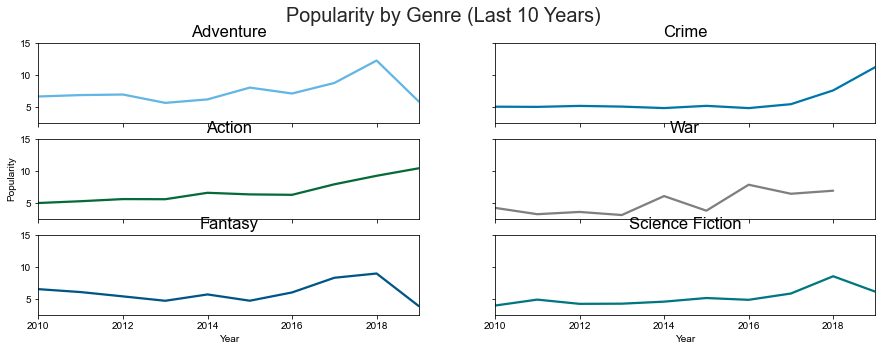

In [34]:
fig, ax = plt.subplots(3,2, sharex = True, sharey=True, figsize=(15,5))
sns.set_style('darkgrid')
sns.set_context('talk', font_scale=.92)
fig.suptitle('Popularity by Genre (Last 10 Years)')
colors = ['#62b5e5','#046a38','#005587','#0076a8','#7f7f7f','#007680']
l = ['Adventure', 'Action', 'Fantasy', 'Crime','War','Science Fiction']
for i in range(len(l)):
    ax[int(i%3)][int(i//3)].set_xlim(2010,2019)
    ax[int(i%3)][int(i//3)].set_ylim(2.5,15)
    ax[int(i%3)][int(i//3)].set_title(l[i])
#     ax[int(i%3)][int(i//3)].set_facecolor('lightgray')
    ax[1][0].set_ylabel('Popularity')
    ax[2][0].set_xlabel('Year')
    ax[2][1].set_xlabel('Year')
    
    sns.lineplot(ax=ax[i%3][i//3], x=avgPopByGenre[l[i]].index, y=avgPopByGenre[l[i]]['popularity'].values, color=colors[i])

Profitability By Genre (average)

In [35]:
movieInfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"['Action', 'Adventure', 'Classics', 'Drama']",William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,-,0.0,104,-
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"['Drama', 'Science Fiction', 'Fantasy']",David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"['Drama', 'Music']",Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,-,0.0,116,-
3,6,Michael Douglas runs afoul of a treacherous su...,R,"['Drama', 'Mystery']",Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,-,0.0,128,-
4,7,-,NR,"['Drama', 'Romance']",Rodney Bennett,Giles Cooper,-,-,-,0.0,200,-


In [36]:
movieInfo['currency'].value_counts()

-    1217
$     339
Name: currency, dtype: int64

In [37]:
type(movieInfo['genre'][2])

str

In [38]:
import ast
movieInfo.genre = movieInfo.genre.map(lambda x: ast.literal_eval(x))

In [39]:
type(movieInfo['genre'][2])

list

In [40]:
valCGenres = list(movieInfo['genre'].value_counts().index)
l = []
for i in valCGenres:
    for j in i:
        l.append(j)
genres=set(l)
print(genres)
genres = list(genres)

{'Documentary', 'Art House and International', 'Western', 'Horror', 'Cult Movies', 'Action', 'TV Movie', '-', 'Comedy', 'Mystery', 'Faith and Spirituality', 'Classics', 'Fantasy', 'Special Interest', 'Drama', 'Science Fiction', 'Animation', 'Anime and Manga', 'Gay and Lesbian', 'Family', 'Adventure', 'Music', 'Romance', 'Sports and Fitness'}


In [41]:
# Creates a column for every value in the genres list and returns true if that value shows up in the genre column
for i in range(len(genres)):
    movieInfo[genres[i]] = (movieInfo['genre'].map(lambda x: genres[i] in x).astype(int))

In [42]:
movieInfo

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,Drama,Science Fiction,Animation,Anime and Manga,Gay and Lesbian,Family,Adventure,Music,Romance,Sports and Fitness
0,1,"This gritty, fast-paced, and innovative police...",R,"[Action, Adventure, Classics, Drama]",William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,-,0.0,...,1,0,0,0,0,0,1,0,0,0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science Fiction, Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,...,1,1,0,0,0,0,0,0,0,0
2,5,Illeana Douglas delivers a superb performance ...,R,"[Drama, Music]",Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,-,0.0,...,1,0,0,0,0,0,0,1,0,0
3,6,Michael Douglas runs afoul of a treacherous su...,R,"[Drama, Mystery]",Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,-,0.0,...,1,0,0,0,0,0,0,0,0,0
4,7,-,NR,"[Drama, Romance]",Rodney Bennett,Giles Cooper,-,-,-,0.0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1996,Forget terrorists or hijackers -- there's a ha...,R,"[Action, Adventure, Horror, Mystery]",-,-,2006-08-18 00:00:00,2007-01-02 00:00:00,$,33886034.0,...,0,0,0,0,0,0,1,0,0,0
1552,1997,The popular Saturday Night Live sketch was exp...,PG,"[Comedy, Science Fiction, Fantasy]",Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23 00:00:00,2001-04-17 00:00:00,-,0.0,...,0,1,0,0,0,0,0,0,0,0
1553,1998,"Based on a novel by Richard Powell, when the l...",G,"[Classics, Comedy, Drama, Music]",Gordon Douglas,-,1962-01-01 00:00:00,2004-05-11 00:00:00,-,0.0,...,1,0,0,0,0,0,0,1,0,0
1554,1999,The Sandlot is a coming-of-age story about a g...,PG,"[Comedy, Drama, Family, Sports and Fitness]",David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01 00:00:00,2002-01-29 00:00:00,-,0.0,...,1,0,0,0,0,1,0,0,0,1


In [43]:
genre_dict2={}
for i in genres:
    genre_dict2[i] = movieInfo[(movieInfo[i]==1) & (movieInfo['box_office']>1)]['box_office'].astype(int).median()

In [44]:
genre_dict2
# movieInfo['Comedy'].value_counts()

{'Documentary': 419361.0,
 'Art House and International': 1089802.0,
 'Western': 7200000.0,
 'Horror': 19755422.0,
 'Cult Movies': 13900000.0,
 'Action': 36282491.0,
 'TV Movie': 2927972.0,
 '-': nan,
 'Comedy': 17364602.0,
 'Mystery': 17230619.5,
 'Faith and Spirituality': 4894004.0,
 'Classics': 6750000.0,
 'Fantasy': 33075902.0,
 'Special Interest': 308164.0,
 'Drama': 8518148.0,
 'Science Fiction': 33075902.0,
 'Animation': 42194060.0,
 'Anime and Manga': nan,
 'Gay and Lesbian': nan,
 'Family': 39764012.0,
 'Adventure': 36282491.0,
 'Music': 4894004.0,
 'Romance': 22701447.5,
 'Sports and Fitness': 21241679.0}

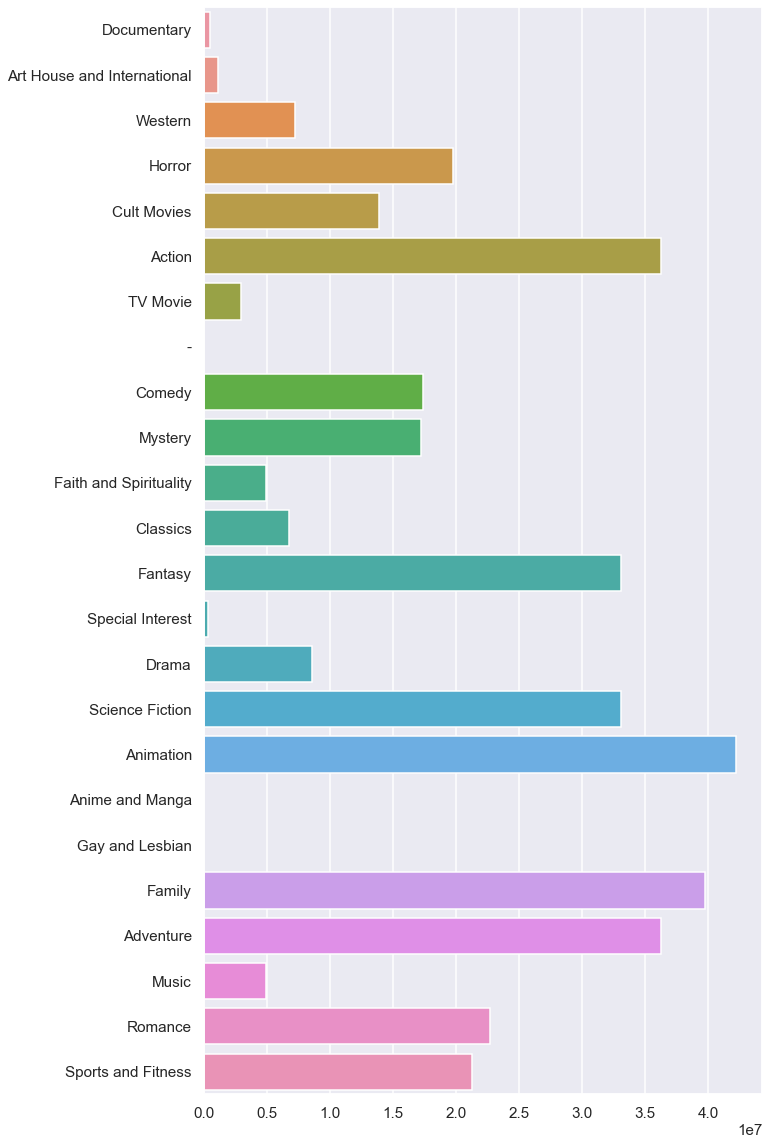

In [45]:
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(y = list(genre_dict2.keys()), x=list(genre_dict2.values()))
# list(genre_dict2.values())
plt.show()

In [46]:
genre_dict_len={}
for i in genres:
    genre_dict_len[i] = len(movieInfo[(movieInfo[i]==1) & (movieInfo['box_office']>1)]['box_office'])

In [47]:
genre_dict_len
gdl2 = {k:v for (k,v) in genre_dict_len.items() if v>25}

In [48]:
avgRevforPopularGenres = {k:v for (k,v) in genre_dict2.items() if k in gdl2.keys()}
# sort the values
avgRevforPopularGenres = {k:v for k,v in sorted(avgRevforPopularGenres.items(), key=lambda item: item[1], reverse = True)}


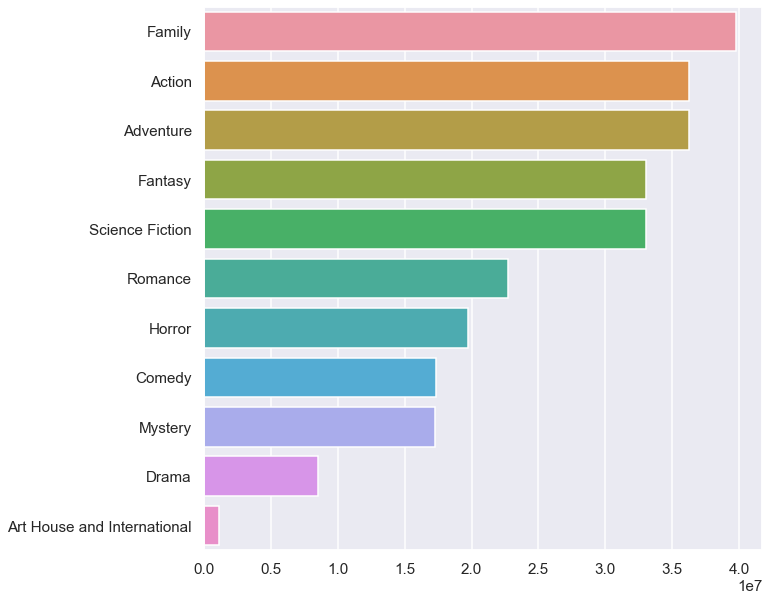

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(y = list(avgRevforPopularGenres.keys()), x=list(avgRevforPopularGenres.values()))
# list(genre_dict2.values())
plt.show()

In [50]:
avgRevforPopularGenres

{'Family': 39764012.0,
 'Action': 36282491.0,
 'Adventure': 36282491.0,
 'Fantasy': 33075902.0,
 'Science Fiction': 33075902.0,
 'Romance': 22701447.5,
 'Horror': 19755422.0,
 'Comedy': 17364602.0,
 'Mystery': 17230619.5,
 'Drama': 8518148.0,
 'Art House and International': 1089802.0}

In [51]:
movieInfo['runtime']
movieInfo['box_office']

0              0.0
1         600000.0
2              0.0
3              0.0
4              0.0
           ...    
1551    33886034.0
1552           0.0
1553           0.0
1554           0.0
1555           0.0
Name: box_office, Length: 1556, dtype: float64

In [52]:
sales = movieInfo[movieInfo['box_office']>0]
sales['box_office']

1         600000.0
6       41032915.0
7         224114.0
8         134904.0
15       1039869.0
           ...    
1538    25335935.0
1539     1416189.0
1541       59371.0
1542      794306.0
1551    33886034.0
Name: box_office, Length: 339, dtype: float64

<AxesSubplot:xlabel='runtime', ylabel='box_office'>

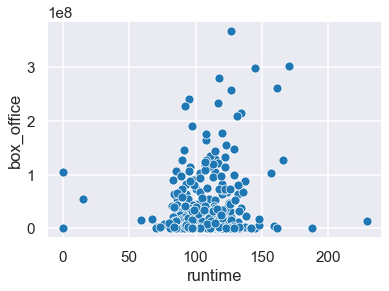

In [53]:
sns.scatterplot(x=sales['runtime'], y=sales['box_office'])

C:\Users\aplante\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='box_office', ylabel='Density'>

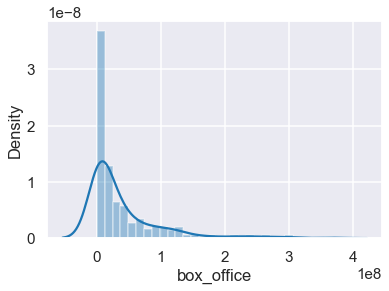

In [54]:
sns.distplot(sales['box_office'])

In [55]:
movieGross.head()

,Unnamed: 0,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000,652000000,2010-01-01
1,1,Alice in Wonderland (2010),BV,334200000,691300000,2010-01-01
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010-01-01
3,3,Inception,WB,292600000,535700000,2010-01-01
4,4,Shrek Forever After,P/DW,238700000,513900000,2010-01-01


In [56]:
dgByYear = movieGross['domestic_gross'].groupby(movieGross['year']).median()

<AxesSubplot:xlabel='year', ylabel='domestic_gross'>

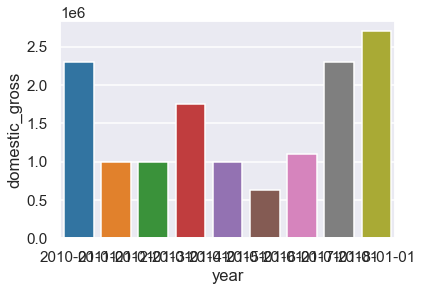

In [57]:
sns.barplot(x = dgByYear.index, y=dgByYear)

In [58]:
#ROI profit / cost
movieBudgets['ROI']=(movieBudgets['worldwide_gross']-movieBudgets['production_budget'])/movieBudgets['production_budget']*100

In [59]:
movieBudgets

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636
...,...,...,...,...,...,...,...,...
5777,5777,78,2018-12-31,Red 11,7000,0,0,-100.000000
5778,5778,79,1999-04-02,Following,6000,48482,240495,3908.250000
5779,5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-73.240000
5780,5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-100.000000


In [60]:
movieBudgets['release_date'] = pd.to_datetime(movieBudgets['release_date'])
movieBudgets['month'] = movieBudgets['release_date'].dt.month
movieBudgets['year'] = movieBudgets['release_date'].dt.year
movieBudgets.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,month,year
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713,12,2009
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,5,2011
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757,6,2019
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,5,2015
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,12,2017


27984448.5

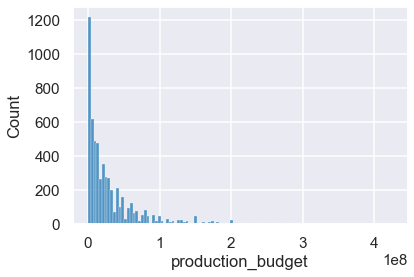

In [61]:
sns.histplot(movieBudgets['production_budget'])
movieBudgets['production_budget'].median()
movieBudgets['worldwide_gross'].median()

In [62]:
# only want ot select movies with bigger budgets. 
movieBudgets[(movieBudgets['production_budget']>1000000) & (movieBudgets['worldwide_gross']>1000000)]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,month,year
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713,12,2009
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,5,2011
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757,6,2019
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,5,2015
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,12,2017
...,...,...,...,...,...,...,...,...,...,...
5195,5195,96,2012-03-23,Serbuan maut,1100000,4105123,9297407,745.218818,3,2012
5196,5196,97,1986-09-26,Down by Law,1100000,1436000,1436000,30.545455,9,1986
5197,5197,98,1987-09-04,The Offspring,1100000,1355728,1355728,23.248000,9,1987
5208,5208,9,2009-12-11,Rocket Singh: Salesman of the Year,1070000,164649,5348767,399.884766,12,2009


In [63]:
medianByMonth = movieBudgets['ROI'].groupby(movieBudgets['month']).median()

<AxesSubplot:xlabel='month', ylabel='ROI'>

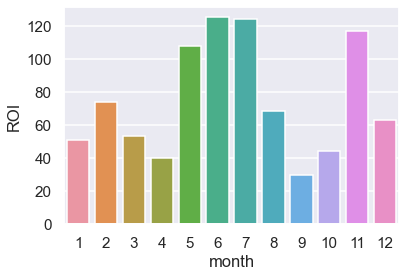

In [64]:
sns.barplot(x=medianByMonth.index, y=medianByMonth)

<AxesSubplot:xlabel='month', ylabel='ROI'>

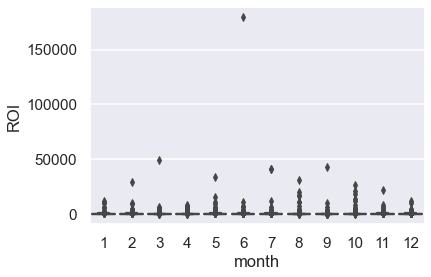

In [65]:
# medianByMonth = movieBudgets['ROI'].groupby(movieBudgets['month'])
sns.boxplot(x=movieBudgets['month'], y=movieBudgets['ROI'])

<AxesSubplot:title={'center':'ROI by Month'}, xlabel='month', ylabel='ROI'>

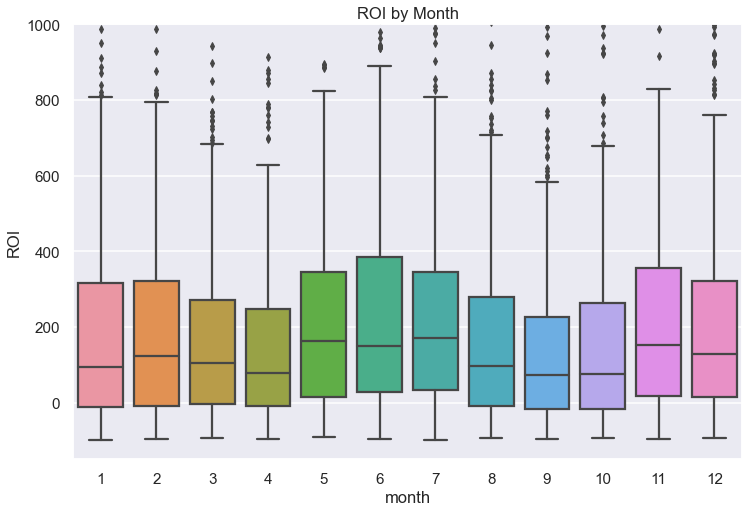

In [78]:
movieBudgetsAdj = movieBudgets[(movieBudgets['production_budget']>1000000) & (movieBudgets['worldwide_gross']>1000000)]
fig, ax = plt.subplots(figsize = (12,8))
ax.set_ylim(-150,1000)
ax.set_title("ROI by Month")
sns.boxplot(x=movieBudgetsAdj['month'], y=movieBudgetsAdj['ROI'])
# fig, ax = plt.subplots(3,2, sharex = True, sharey=True, figsize=(15,5))

C:\Users\aplante\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ROI', ylabel='Density'>

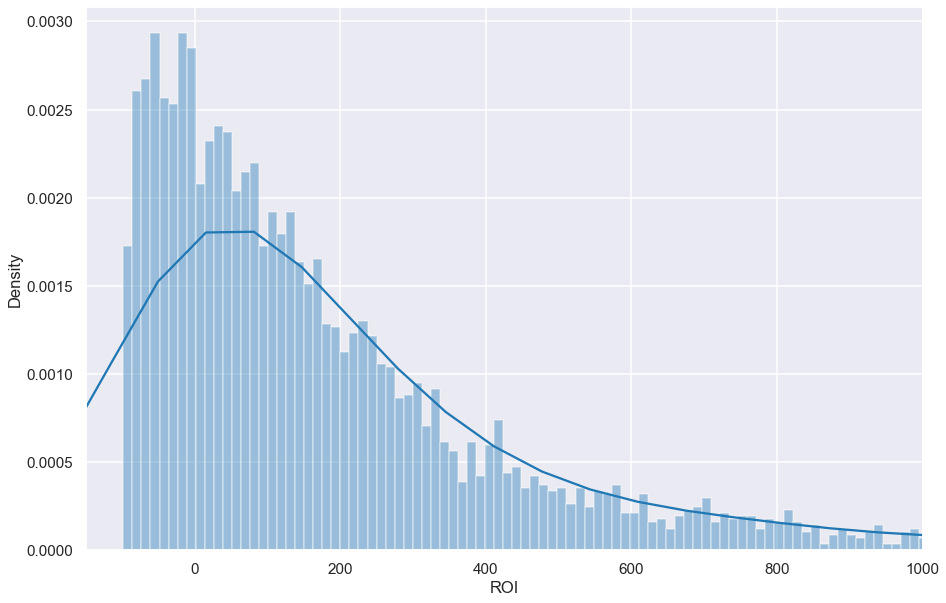

In [76]:
fig, ax = plt.subplots(figsize = (15,10))
ax.set_xlim(-150,1000)
sns.distplot(movieBudgetsAdj['ROI'], bins=1000)

In [116]:
stats.f_oneway(di[1],di[2],di[3],di[4],di[5],di[6],di[7],di[8],di[9],di[10],di[11],di[12])

F_onewayResult(statistic=1.7831764145772773, pvalue=0.05125699045835469)

In [81]:
pd.DataFrame(movieBudgets['ROI'].groupby(movieBudgets['month']))

,0,1
0,1,210 269.713673 280 -50.685762 328 ...
1,2,41 574.129112 90 1.666212 123 ...
2,3,13 2.828400 17 247.000112 50 ...
3,4,6 582.711400 22 393.938507 66 ...
4,5,1 154.667286 3 324.384139 7 ...
5,6,2 -57.210757 23 61.243563 28...
6,7,10 294.341491 12 -5.453776 19 ...
7,8,86 42.547712 93 197.489166 99 ...
8,9,146 -21.407805 329 169.078978 353 ...
9,10,79 40.193194 192 1.017315 245 ...


In [117]:
di = {}
for i in range(1,13):
    di[i]=movieBudgetsAdj[movieBudgetsAdj['month']==i]['ROI']
for i in range(1,13):
    di[i] = list(di[i].values)
stats.f_oneway(di[1],di[2],di[3],di[4],di[5],di[6],di[7],di[8],di[9],di[10],di[11],di[12])

F_onewayResult(statistic=1.7831764145772773, pvalue=0.05125699045835469)

In [119]:
di = {}
for i in range(1,13):
    di[i]=movieBudgets[movieBudgets['month']==i]['ROI']
for i in range(1,13):
    di[i] = list(di[i].values)
stats.f_oneway(di[1],di[2],di[3],di[4],di[5],di[6],di[7],di[8],di[9],di[10],di[11],di[12])

F_onewayResult(statistic=0.8890783678384351, pvalue=0.5503508227724814)

In [112]:
for i in range(1,13):
    di[i] = list(di[i].values)

In [113]:
di[1].values

AttributeError: 'list' object has no attribute 'values'

In [114]:
di[1]

[269.71367285714285,
 -50.6857616,
 108.32318454545455,
 -1.7729829999999998,
 305.9215988235294,
 98.43852125,
 41.65717875,
 -98.03655225806452,
 -59.16441333333333,
 129.11418571428572,
 0.7812357142857143,
 -29.638912857142856,
 -71.61347571428571,
 -15.780972857142858,
 -71.90713714285715,
 -12.577487692307693,
 14.731215384615384,
 335.8664524590164,
 33.03227704918032,
 51.20536,
 118.96235333333334,
 73.501505,
 38.020759999999996,
 -43.40565333333333,
 11.09323,
 -75.30584333333333,
 -49.339776666666666,
 -77.94463333333333,
 -51.951786440677964,
 -13.16293448275862,
 541.9564124999999,
 370.5256309090909,
 -79.03132000000001,
 329.899432,
 38.82274,
 5.9755080000000005,
 -86.74777,
 -97.498766,
 582.6175499999999,
 134.60497083333334,
 136.24111789473685,
 -19.311025531914893,
 70.36779333333332,
 152.0394711111111,
 -3.681673333333333,
 -34.653040000000004,
 -75.10438666666667,
 -95.21213333333334,
 7.940767441860465,
 79.64092470588236,
 312.01050000000004,
 34.377511904761

In [110]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('ROI ~ C(month)', data=movieBudgetsAdj).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(month),7.676880e+06,11.0,1.783176,0.051257
Residual,1.786646e+09,4565.0,NaN,NaN


In [130]:
mbCat = movieBudgets.copy()
mbCat['month'] = mbCat['month'].astype(str)
mod = ols(formula='ROI ~ month + production_budget', data = mbCat)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.242
Date:                Wed, 26 Oct 2022   Prob (F-statistic):            0.00810
Time:                        21:33:44   Log-Likelihood:                -54392.
No. Observations:                5782   AIC:                         1.088e+05
Df Residuals:                    5769   BIC:                         1.089e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           401.8305    159.55

In [120]:
movieBudgets

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,month,year
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713,12,2009
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,5,2011
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757,6,2019
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,5,2015
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,12,2017
...,...,...,...,...,...,...,...,...,...,...
5777,5777,78,2018-12-31,Red 11,7000,0,0,-100.000000,12,2018
5778,5778,79,1999-04-02,Following,6000,48482,240495,3908.250000,4,1999
5779,5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-73.240000,7,2005
5780,5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-100.000000,9,2015


In [126]:
movieInfo.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio', 'Documentary', 'Art House and International', 'Western',
       'Horror', 'Cult Movies', 'Action', 'TV Movie', '-', 'Comedy', 'Mystery',
       'Faith and Spirituality', 'Classics', 'Fantasy', 'Special Interest',
       'Drama', 'Science Fiction', 'Animation', 'Anime and Manga',
       'Gay and Lesbian', 'Family', 'Adventure', 'Music', 'Romance',
       'Sports and Fitness'],
      dtype='object')

In [142]:
mod = ols(formula='box_office ~ runtime + rating + Documentary + Q("Art House and International") + Western +\
    Horror + Q("Cult Movies") + Action + Q("TV Movie") + Comedy + Mystery + Q("Faith and Spirituality") +\
    Classics + Fantasy + Q("Special Interest") + Drama + Animation + Q("Anime and Manga")+\
    Q("Gay and Lesbian") + Family  + Music + Romance + Q("Sports and Fitness")', data = movieInfo)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             box_office   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     7.807
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           4.96e-29
Time:                        21:41:37   Log-Likelihood:                -28948.
No. Observations:                1556   AIC:                         5.795e+04
Df Residuals:                    1527   BIC:                         5.811e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep